# TASK: Develop a recommendation algorithm that leverages the Spotify dataset to suggest music based on user preferences and music attributes.

In [137]:
import numpy as np
import pandas as pd

## STEP 1: Data Loading and Exploration

#### Read the year dataset using pd.read_csv() and assign it to data, genre_data, year_data, and artist_data.

In [138]:
data = pd.read_csv("Final Project Datasets - Spotify\\data.csv")

In [139]:
genre_data = pd.read_csv("Final Project Datasets - Spotify\\data_by_genres.csv")

In [140]:
year_data = pd.read_csv("Final Project Datasets - Spotify\\data_by_year.csv")

In [141]:
artist_data = pd.read_csv("Final Project Datasets - Spotify\\data_by_artist.csv")

#### Display the first two rows of data, genre_data, year_data, and artist_data using head().

In [142]:
print(f"Main Data:\n{data.head(2)}")

Main Data:
   valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz             0.878   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8             0.000   

   key  liveness  loudness  mode  \
0   10     0.665   -20.096     1   
1    7     0.160   -12.441     1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4         1921   
1                            Clancy Lowered the Boom           5         1921   

   speechiness   tempo  
0       0.0366  80.954  
1       0.4150  60.936  


In [143]:
print(f"Genre Data:\n{genre_data.head(2)}")

Genre Data:
   mode                  genres  acousticness  danceability   duration_ms  \
0     1  21st century classical      0.979333      0.162883  1.602977e+05   
1     1                   432hz      0.494780      0.299333  1.048887e+06   

     energy  instrumentalness  liveness   loudness  speechiness       tempo  \
0  0.071317          0.606834    0.3616 -31.514333     0.040567   75.336500   
1  0.450678          0.477762    0.1310 -16.854000     0.076817  120.285667   

    valence  popularity  key  
0  0.103783   27.833333    6  
1  0.221750   52.500000    5  


In [144]:
print(f"Year Data:\n{year_data.head(2)}")

Year Data:
   mode  year  acousticness  danceability    duration_ms    energy  \
0     1  1921      0.886896      0.418597  260537.166667  0.231815   
1     1  1922      0.938592      0.482042  165469.746479  0.237815   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.344878   0.20571 -17.048667     0.073662  101.531493  0.379327   
1          0.434195   0.24072 -19.275282     0.116655  100.884521  0.535549   

   popularity  key  
0    0.653333    2  
1    0.140845   10  


In [145]:
print(f"Artist Data:\n{artist_data.head(2)}")

Artist Data:
   mode  count  acousticness                           artists  danceability  \
0     1      9      0.590111  "Cats" 1981 Original London Cast      0.467222   
1     1     26      0.862538         "Cats" 1983 Broadway Cast      0.441731   

     duration_ms    energy  instrumentalness  liveness  loudness  speechiness  \
0  250318.555556  0.394003          0.011400  0.290833   -14.448     0.210389   
1  287280.000000  0.406808          0.081158  0.315215   -10.690     0.176212   

        tempo   valence  popularity  key  
0  117.518111  0.389500   38.333333    5  
1  103.044154  0.268865   30.576923    5  


#### Retrieve information about data and genre_data using info().

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [147]:
genre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


#### Create a decade column in data representing the decade of each track using apply() and a lambda function.

In [148]:
data['decade'] = data['year'].apply(lambda x: (x // 10) * 10)

In [149]:
# display the update data dataset wth the newly created column
data.head(2)

valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz             0.878   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8             0.000   

   key  liveness  loudness  mode  \
0   10     0.665   -20.096     1   
1    7     0.160   -12.441     1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4         1921   
1                            Clancy Lowered the Boom           5         1921   

   speechiness   tempo  decade  
0       0.0366  80.954    1920  
1       0.4150  60.936    1920

## STEP 2: DATA ANALYSIS AND VISUALISATIONS

#### Visualize the distribution of tracks across different decades using a count plot: sns.countplot(data['decade']).

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


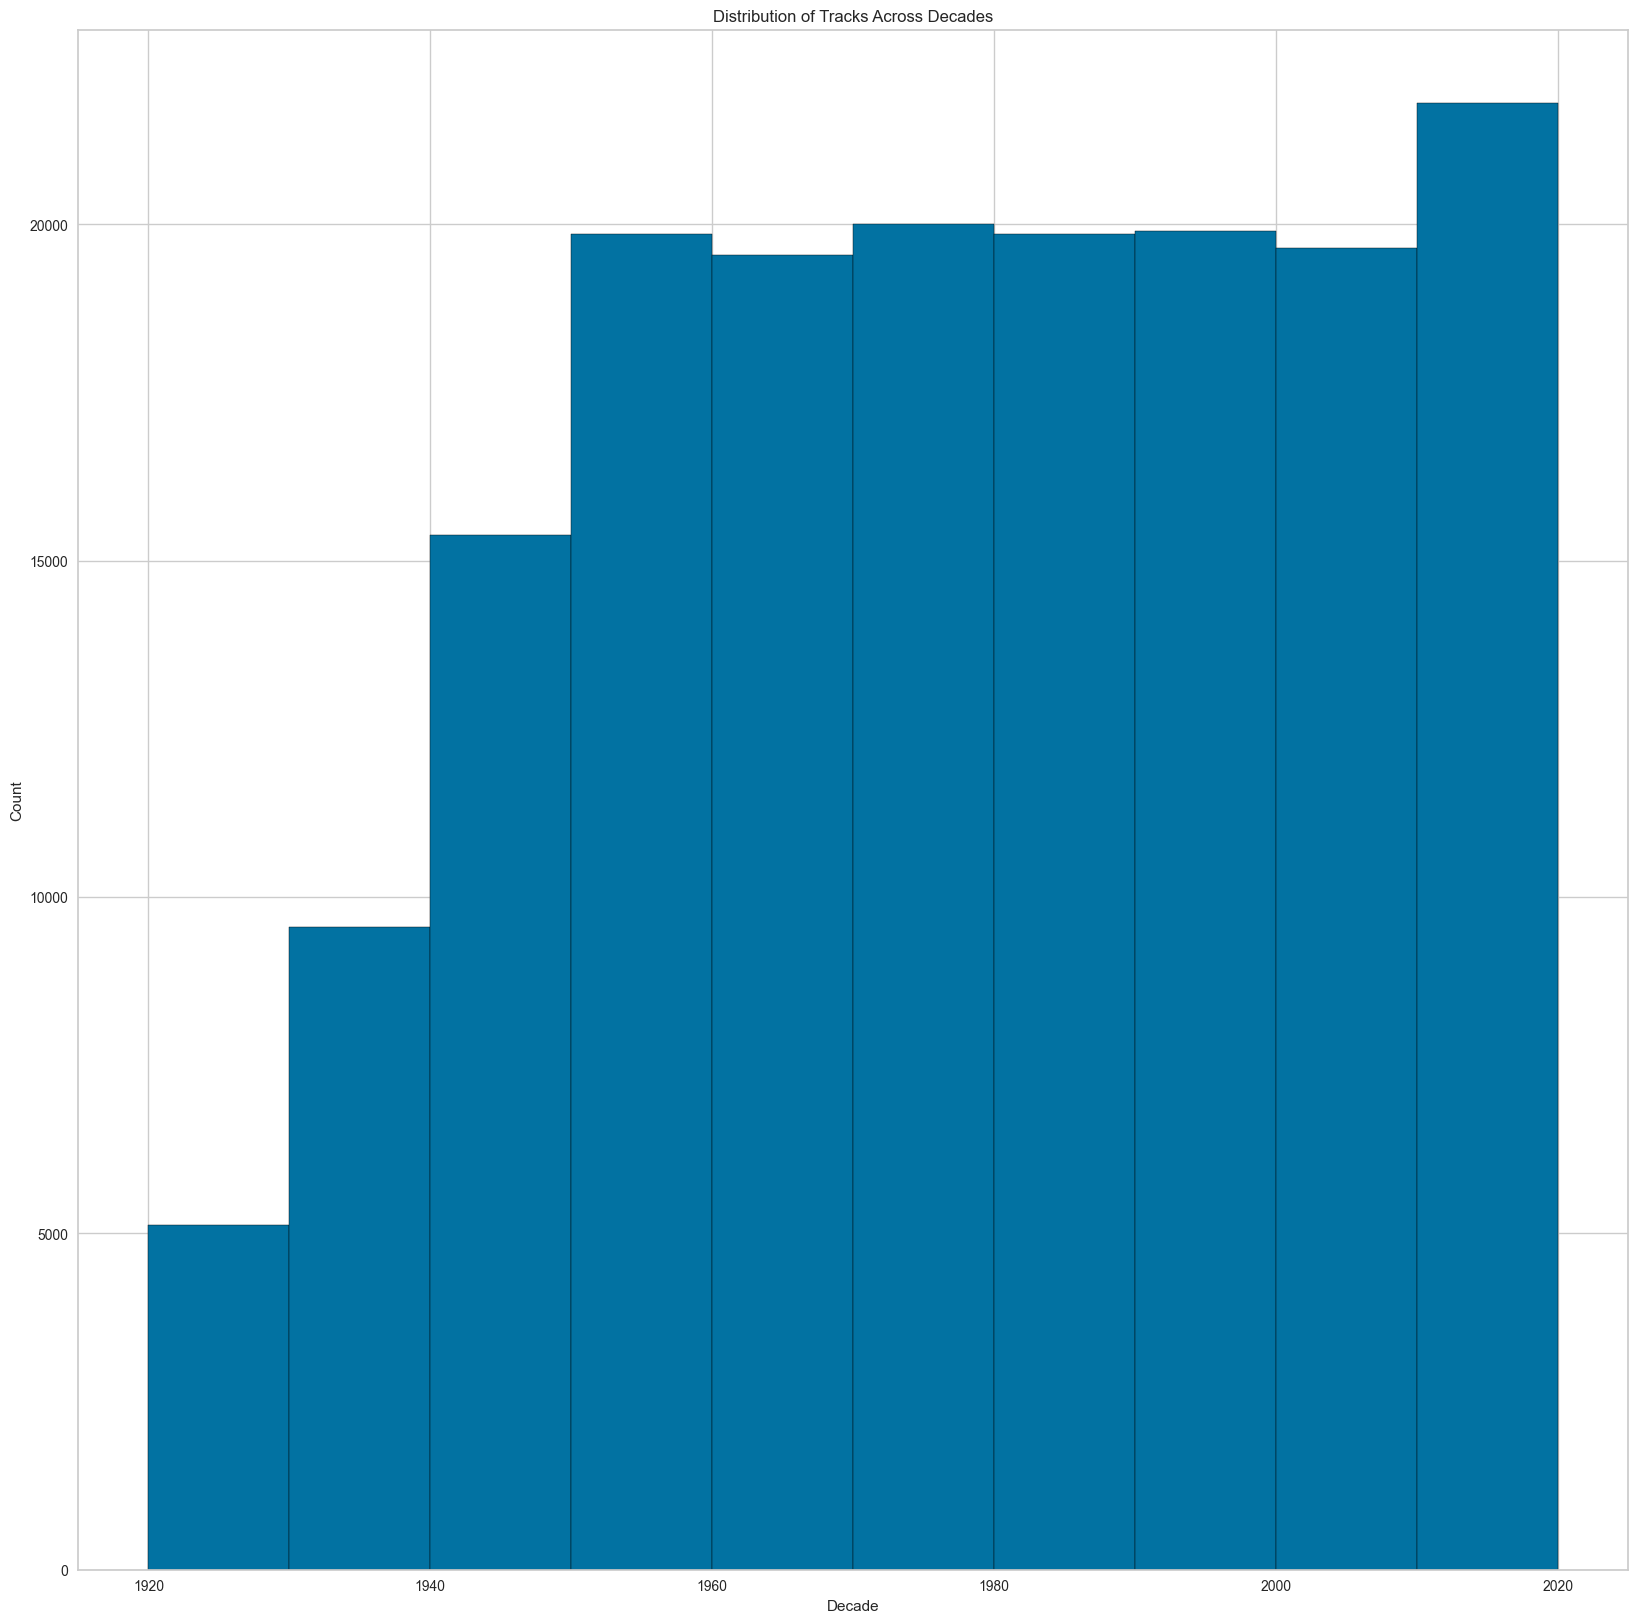

In [151]:
# Plotting the distribution of tracks across decades
plt.hist(data['decade'], bins=10, edgecolor='black')
plt.title('Distribution of Tracks Across Decades')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.show()

#### Plot the trends of various sound features (acousticness, danceability, energy, instrumentalness, liveness, valence) over decades using a line plot: px.line(year_data, x='year', y=sound_features, title='Trend of various sound features over decades').

In [152]:
# Plotting a line chart to show the trend of various sound features over the decades
import plotly.express as px

sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']

fig = px.line(year_data, x='year', y=sound_features, title='Trend of various sound features over decades')
fig.show()

In [153]:
# Plotting a line chart to show the trend of loudness over the decades
fig = px.line(year_data, x='year', y='loudness', title='Trend of loudness over decades')
fig.show()

#### Identify the top 10 genres based on popularity and plot the trends of various sound features (valence, energy, danceability, acousticness) for these genres using a grouped bar chart: px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group', title='Trend of various sound features over top 10 genres').

In [154]:
# Plotting a group bar chart to show the top 10 genre by popularity and their trends of various sound features
top10_genres = genre_data.sort_values('popularity', ascending=False).head(10)

fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group', title='Trend of various sound features over top 10 genres')
fig.show()

#### Generate a word cloud of the genres present in the dataset using the WordCloud library: WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, max_words=40, min_font_size=10).generate(comment_words)

In [155]:
# Creating a word cloud to show the genres present in the Genre dataset
from wordcloud import WordCloud
from collections import Counter
import string

Song_Genres = genre_data['genres'].str.split(',').explode().str.strip().str.lower()
stopwords = set(string.punctuation)

comment_words = ' '.join(Song_Genres)

Genres_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                max_words=40,
                min_font_size = 10).generate(comment_words)


#### Plot the word cloud of the genres: plt.imshow(wordcloud).

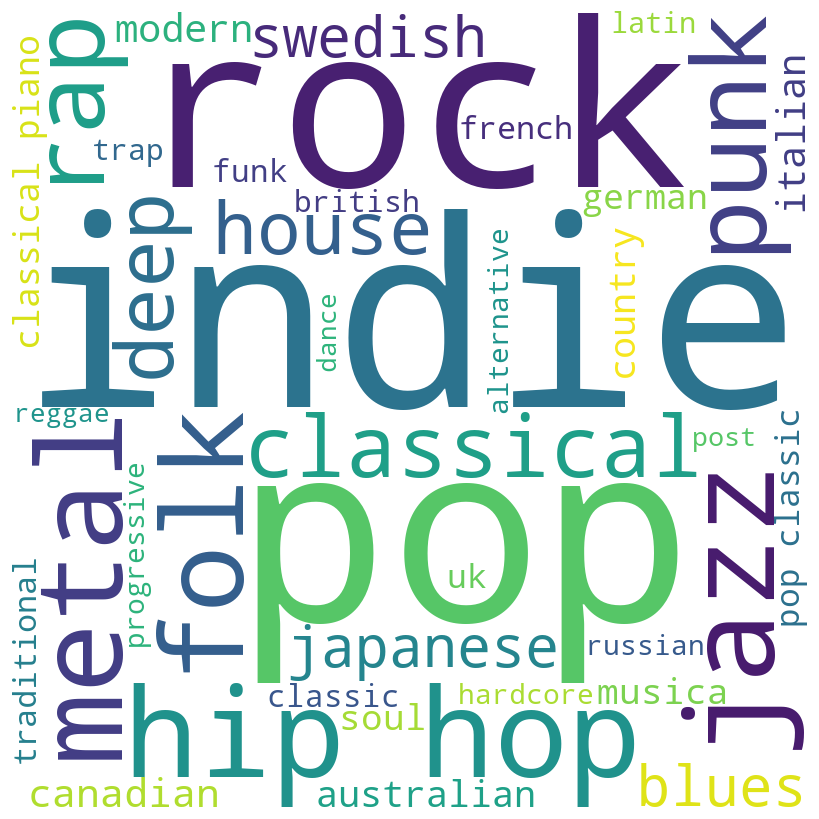

In [156]:
# Plotting a word cloud of Genres
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(Genres_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

#### Generate a word cloud of the artists present in the dataset using the WordCloud library: WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_word_length=3, max_words=40, min_font_size=10).generate(comment_words).

In [157]:
# Creating a word cloud to show the Music Artists present in the Artist dataset
from wordcloud import WordCloud
from collections import Counter
import string

Music_Artists = artist_data['artists'].str.split(',').explode().str.strip().str.lower()
Artists_stopwords = set(string.punctuation)

Artists_comment_words = ' '.join(Music_Artists)

Artist_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = Artists_stopwords,
                min_word_length=3, 
                max_words=40,
                min_font_size = 10).generate(Artists_comment_words)

#### Plot the word cloud of the artists: plt.imshow(wordcloud).

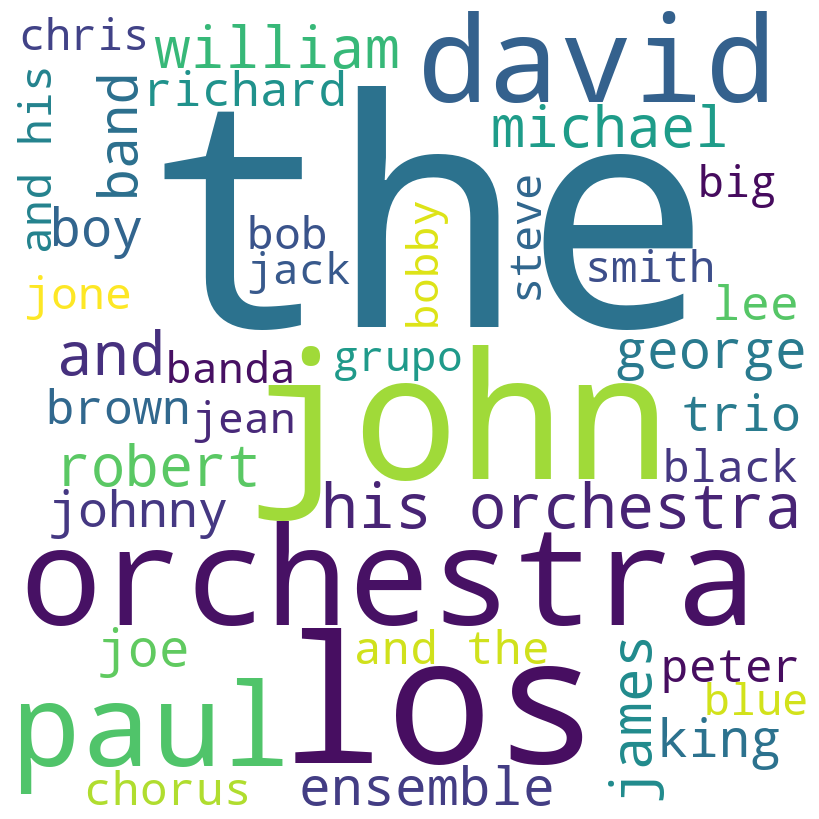

In [158]:
# Plotting a word cloud of Music Artists
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(Artist_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

#### Identify the top 10 artists with the most songs produced and display the count and artist name: top10_most_song_produced_artists[['count','artists']].sort_values('count', ascending=False).

In [159]:
# Identifying the top 10 artists with the highest number of tracks
top10_most_song_produced_artists = data['artists'].value_counts().reset_index()
top10_most_song_produced_artists.columns = ['artists', 'count']

top10_most_song_produced_artists = top10_most_song_produced_artists.nlargest(10, 'count')

print(top10_most_song_produced_artists[['count','artists']].sort_values('count', ascending=False))

   count                 artists
0   1211    ['Эрнест Хемингуэй']
1   1068   ['Эрих Мария Ремарк']
2    942    ['Francisco Canaro']
3    630       ['Frank Sinatra']
4    628     ['Ignacio Corsini']
5    504       ['Elvis Presley']
6    484         ['Johnny Cash']
7    474           ['Bob Dylan']
8    471  ['The Rolling Stones']
9    455      ['The Beach Boys']


#### Identify the top 10 artists with the highest popularity score and display the popularity score and artist name: top10_popular_artists[['popularity','artists']].sort_values('popularity', ascending=False).

In [160]:
# Identifying the top 10 artists with the highest popularity score
top10_popular_artists = data[['artists', 'popularity']].groupby('artists')['popularity'].mean().reset_index()

top10_popular_artists = top10_popular_artists.rename(columns={'popularity': 'Popularity Rating'})

top10_popular_artists = top10_popular_artists.nlargest(10, 'Popularity Rating')

# Reorder columns and add index
top10_popular_artists = top10_popular_artists[['artists', 'Popularity Rating']].reset_index(drop=True)

# Add custom index
top10_popular_artists.index += 1

print(top10_popular_artists)

                                              artists  Popularity Rating
1                        ['Bad Bunny', 'Jhay Cortez']              100.0
2                           ['24kGoldn', 'iann dior']               99.0
3                  ['Cardi B', 'Megan Thee Stallion']               96.0
4                   ['Justin Bieber', 'benny blanco']               95.0
5                              ['Joel Corry', 'MNEK']               94.0
6   ['Sech', 'Daddy Yankee', 'J Balvin', 'ROSALÍA'...               94.0
7                               ['Drake', 'Lil Durk']               93.0
8                                     ['Ritt Momney']               93.0
9      ['J Balvin', 'Tainy', 'Dua Lipa', 'Bad Bunny']               92.0
10        ['Jay Wheeler', 'DJ Nelson', 'Myke Towers']               92.0


#### Determining the correlation of Music Features

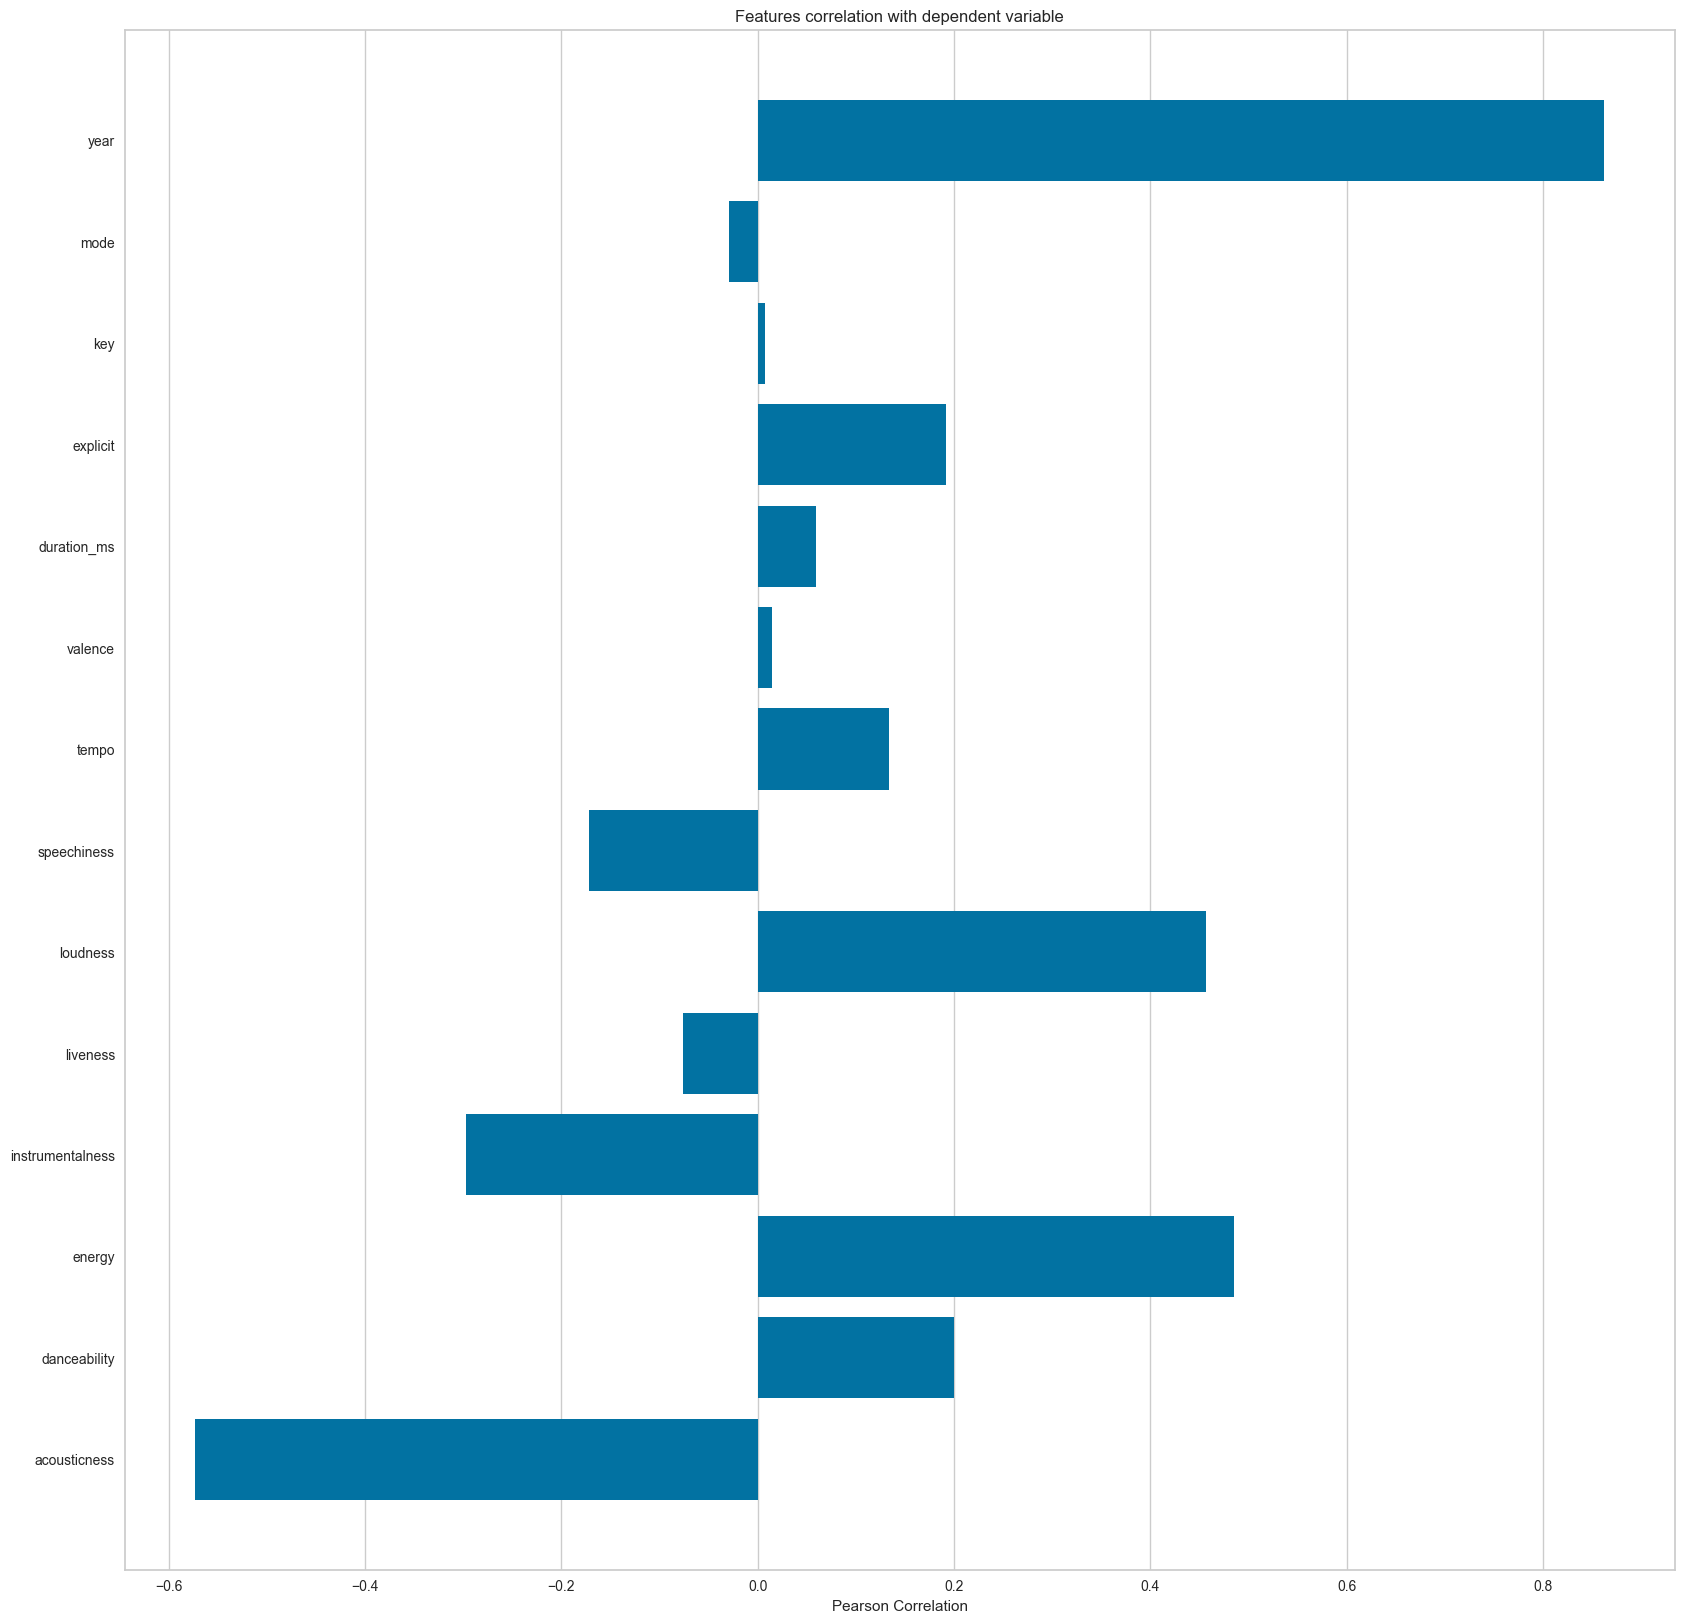

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [161]:
# Creating a Pearson correlation graph to show the relationship between the sound features
from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

X, y = data[feature_names], data['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

#### Make a conclusion about our Data

##### The Spotify dataset reveals significant insights into the evolution of music over time. Key findings include:
- A noticeable shift in sound features, such as acousticness and danceability, across decades, indicating changing musical preferences.
- Loudness has steadily increased over time, reflecting advancements in production techniques.
- The top 10 genres demonstrate distinct trends in valence, energy, danceability, and acousticness, which can guide further exploration of listener preferences.
- The word clouds effectively highlight the most prevalent genres and artists, providing a quick visual summary of the dataset's diversity.
- Analysis of top artists showcases their dominance in terms of production and popularity, emphasizing their impact on the music industry.

The analysis also showed that certain genres, such as Hip-Hop, Indie, Pop and Rock, dominated the music industry, while artists like Bad Bunny and Jhay Cortez achieved exceptionally high popularity scores. There is a shifting preferences for certain sound features like the drop overtime between 1940 and 2020 in acousticness, relatively constant movement in liveness and the gradual increase in the energy sound features. 

This analysis establishes a strong understanding of the dataset, serving as a foundation for the clustering and recommendation system development in subsequent phases.

## STEP 3 - CLUSTERING

#### Fit a K-means clustering model on the genre data using 12 clusters. Assign the cluster labels to each genre.

In [162]:
# Preparing K-means Clustering on Genre Data
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

genre_cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])
X = genre_data.select_dtypes(np.number)
genre_cluster_pipeline.fit(X)
genre_data['cluster'] = genre_cluster_pipeline.predict(X)


#### Visualize the clusters of genres using t-SNE dimensionality reduction technique. Plot the scatter plot with clusters colored and display genre information on hover.

In [163]:
# Visualize Genre Clusters using t-SNE
from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'],
    title='t-SNE Projection of Genre Clusters',
    labels={'x': 't-SNE Dimension 1', 'y': 't-SNE Dimension 2'})
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.012s...
[t-SNE] Computed neighbors for 2973 samples in 0.522s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.777516
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.106293
[t-SNE] KL divergence after 1000 iterations: 1.392366


#### Fit a K-means clustering model on the song data using 25 clusters. Assign the cluster labels to each song.

In [164]:
# Preparing K-means Clustering on Song Data

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MaxAbsScaler


# Load the song data
song_data = pd.read_csv("Final Project Datasets - Spotify\\spotify_millsongdata.csv")
print(f"Song Data Shape:\n {song_data.shape}")

# Concatenate the text columns into a single column
song_data['combined_text'] = song_data['artist'].astype(str) + ' ' + song_data['song'].astype(str) + ' ' + song_data['text'].astype(str)

# Apply the TfidfVectorizer to the concatenated column
vectorizer = TfidfVectorizer()
vectorized_song_data = vectorizer.fit_transform(song_data['combined_text'])

# Scale the data
scaler = MaxAbsScaler()
scaled_song_data = scaler.fit_transform(vectorized_song_data)

# Apply K-means clustering
kmeans_text = KMeans(n_clusters=25, random_state=42)
song_clusters = kmeans_text.fit_predict(scaled_song_data)


Song Data Shape:
 (57650, 4)


In [165]:
# Define the clustering pipeline
song_cluster_pipeline = Pipeline([('kmeans', KMeans(n_clusters=20, verbose=False))], 
                                    verbose=False)

# Fit the pipeline
song_cluster_pipeline.fit(scaled_song_data)

# Predict cluster labels
song_cluster_labels = song_cluster_pipeline.predict(scaled_song_data)

# Assign cluster labels to the data
song_data['cluster_label'] = song_cluster_labels

# View the first few rows of the updated DataFrame
print(song_data.head())

# Analyze the clusters
cluster_counts = song_data['cluster_label'].value_counts()
print(cluster_counts)

# Analyze the text data in each cluster
for cluster in range(20):
    cluster_data = song_data[song_data['cluster_label'] == cluster]
    print(f"Cluster {cluster}:")
    print(cluster_data['combined_text'].head())

  artist                   song                                        link  \
0   ABBA  Ahe's My Kind Of Girl  /a/abba/ahes+my+kind+of+girl_20598417.html   
1   ABBA       Andante, Andante       /a/abba/andante+andante_20002708.html   
2   ABBA         As Good As New        /a/abba/as+good+as+new_20003033.html   
3   ABBA                   Bang                  /a/abba/bang_20598415.html   
4   ABBA       Bang-A-Boomerang      /a/abba/bang+a+boomerang_20002668.html   

                                                text  \
0  Look at her face, it's a wonderful face  \r\nA...   
1  Take it easy with me, please  \r\nTouch me gen...   
2  I'll never know why I had to go  \r\nWhy I had...   
3  Making somebody happy is a question of give an...   
4  Making somebody happy is a question of give an...   

                                       combined_text  cluster_label  
0  ABBA Ahe's My Kind Of Girl Look at her face, i...             13  
1  ABBA Andante, Andante Take it easy with me, p

#### Visualize the clusters of songs using PCA dimensionality reduction technique. Plot the scatter plot with clusters colored and display song information on hover.

In [166]:
# Visualize Song Clusters using PCA

from sklearn.decomposition import PCA
import plotly.express as px

# Apply PCA
pca_pipeline = Pipeline([('pca', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(scaled_song_data)
projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = song_data['song']
projection['cluster'] = song_data['cluster_label']

# Create a scatter plot
fig = px.scatter(
    projection,
    x='x',
    y='y',
    color='cluster',
    hover_data=['x', 'y', 'title'],
    title='K-Means Clustering of Songs'
)

# Update axis labels
fig.update_layout(
    xaxis_title="PC1 (Song characteristics)",
    yaxis_title="PC2 (Song characteristics)"
)

fig.show()


## STEP 4 - RECOMMENDATION SYSTEM BUILDING

#### Import the necessary libraries: spotipy, SpotifyClientCredentials, defaultdict, UserSecretsClient

In [167]:
# Import necessary libraries
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from collections import defaultdict
from spotipy.oauth2 import SpotifyClientCredentials
import numpy as np
from scipy import spatial
import time
from spotipy.exceptions import SpotifyException


#### Obtain the required client credentials from the Kaggle Secrets API.

In [168]:
# Setting up my Spotify API credentials and Authorization flow

# Your Spotify API credentials
client_id = "9755bbabceef4c588883a2b6557ef28b"
client_secret = "c3bc2a05f46e4a54a4bfa8acbf1dc7ca"
redirect_uri = "http://localhost:8888/callback"

# Create a Spotify client
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=spotipy.SpotifyOAuth(client_id, client_secret, redirect_uri, scope="user-library-read playlist-read-private"))

#### Define a function find_song that finds song details from the Spotify dataset or returns None if the song is unavailable.

In [169]:
# Defining a function to find song data on Spotify
def find_song(song_name, artist_name):
    """Find song data from the Spotify API."""
    query = f"track:{song_name} artist:{artist_name}"
    try:
        result = sp.search(q=query, type="track", limit=1)
        if result["tracks"]["total"] == 0:
            # If no tracks are found, return None
            print(f"Song '{song_name}' not found.")
            return None
        
        # Check if the artist matches
        for track in result["tracks"]["items"]:
            if artist_name.lower() in [artist["name"].lower() for artist in track["artists"]]:
                # If matching artist is found, return track data
                print(f"Song '{song_name}' by '{artist_name}' found!")
                song_data = {
                    "Song Name": track["name"],
                    "Artist Name": track["artists"][0]["name"],
                    "Year": track["album"]["release_date"][:4],
                    "Track ID": track["id"]
                }
                return song_data
        
        # If no matching artist is found, return None
        print(f"Song '{song_name}' by '{artist_name}' not found.")
        return None
    
    except SpotifyException as e:
        print(f"Spotify API error while searching for '{song_name}': {e}")
        return None

# Test the function
song_name = "Happy"
artist_name = "Pharrell Williams"
song_data = find_song(song_name, artist_name)
if song_data:
    for key, value in song_data.items():
        print(f"{key}: {value}")
else:
    print("Song not found.")

Song 'Happy' by 'Pharrell Williams' found!
Song Name: Happy - From "Despicable Me 2"
Artist Name: Pharrell Williams
Year: 2014
Track ID: 60nZcImufyMA1MKQY3dcCH


In [170]:
# Obtain the audio features of a song
def get_audio_features(song_name, artist_name):
    song_data = find_song(song_name, artist_name)
    if song_data is not None:
        track_id = song_data["Track ID"]
        try:
            audio_features = sp.audio_features(track_id)
            return audio_features[0]
        except SpotifyException as e:
            print(f"Spotify API error while getting audio features: {e}")
            return None
    else:
        print("Song not found.")
        return None

# Test the function
song_name = "Happy"
artist_name = "Pharrell Williams"
audio_features = get_audio_features(song_name, artist_name)
if audio_features is not None:
    print(audio_features)

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=60nZcImufyMA1MKQY3dcCH with Params: {} returned 403 due to None


Song 'Happy' by 'Pharrell Williams' found!
Spotify API error while getting audio features: http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=60nZcImufyMA1MKQY3dcCH:
 None, reason: None


#### Define a function get_song_data that fetches song details from the dataset or searches for details in the Spotify dataset if unavailable.

In [171]:
# Defining a function to get song data on Spotify
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import difflib

def get_song_data(song, sp):
    try:
        result = sp.search(q=f"track:{song['song_name']} artist:{song['artist_name']}", type="track", limit=1)
        if result["tracks"]["total"] == 0:
            print(f"Song '{song['song_name']}' not found.")
            return None
        track = result["tracks"]["items"][0]
        song_data = {
            'name': track['name'],
            'artist': track['artists'][0]['name'],
            'year': track['album']['release_date'][:4],
            'id': track['id'],
            'explicit': int(track['explicit']),
            'duration_ms': track['duration_ms'],
            'popularity': track['popularity']
        }
        return song_data
    except Exception as e:
        print(f"Error in get_song_data for {song['song_name']}: {e}")
        return None


# Test the get_song_data function
song_name = "Happy"
artist_name = "Pharrell Williams"

song = {
    'song_name': song_name,
    'artist_name': artist_name
}

song_data = get_song_data(song, sp)
if song_data is not None:
    print("Song Data:")
    for key, value in song_data.items():
        print(f"{key}: {value}")
else:
    print("Song not found.")


Song Data:
name: Happy - From "Despicable Me 2"
artist: Pharrell Williams
year: 2014
id: 60nZcImufyMA1MKQY3dcCH
explicit: 0
duration_ms: 232720
popularity: 79


#### Define a function get_mean_vector that calculates the mean vector of numerical features for a given list of songs.

In [172]:
# Defining a function to calculate mean vector of the numerical features of a song list 

numerical_features = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']

def get_mean_vector(song_list, sp):
    song_vectors = []
    for song in song_list:
        song_data = get_song_data(song, sp)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        song_vector = [song_data[feature] for feature in numerical_features]
        song_vectors.append(song_vector)
    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)

#### Define a function flatten_dict_list that flattens a list of dictionaries into a dictionary with grouped keys and corresponding lists of values.

In [173]:
# Defining a function to flatten dictionary list with grouped keys and corresponding lists of values
from collections import defaultdict


def flatten_dict_list(dict_list):

    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []

    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)

    return flattened_dict


#### Define a function recommend_songs that recommends similar songs based on a given list of songs. 
#### Implement the recommendation system by following the instructions provided within each function.

In [181]:
# Defining the function to get recommended songs

from scipy.spatial.distance import cosine
from spotipy.exceptions import SpotifyException

# Function to get recommended songs
def get_recommended_songs(song_list, spotify_data, sp):
    recommended_songs = []
    song_dict = flatten_dict_list(song_list)
    try:
        song_center = get_mean_vector(song_list, spotify_data)
    except ValueError as e:
        print(f"Error calculating mean vector: {e}")
        return []

    # Get the track IDs from the song list
    for song in song_list:
        song_data = get_song_data(song, sp)
        if song_data is None:
            continue
        track_id = song_data['id']
        try:
            track_features = sp.audio_features(track_id)
            if not track_features:
                continue  # Skip if no audio features are found
            # Calculate cosine similarity
            similarity = 1 - cosine(
                list(song_center.values()),
                [track_features.get(feature, 0) for feature in song_center.keys()]
            )
            recommended_songs.append({
                "name": track_features.get("name", "Unknown Track"),
                "artist": track_features.get("artists", [{"name": "Unknown Artist"}])[0].get("name", "Unknown Artist"),
                "similarity": similarity
            })
        except SpotifyException as e:
            print(f"Error retrieving audio features for track {track_id}: {e}")
            continue

    # Sort recommendations based on similarity score (descending)
    recommended_songs.sort(key=lambda x: x["similarity"], reverse=True)

    return recommended_songs


#### Test the recommendation system by calling the recommend_songs function with different song inputs.

In [182]:
# Test the recommendation system
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Dummy get_audio_features function for testing
def get_audio_features(track_id, sp):
    # Mock data simulating a song's audio features
    return {
        "danceability": 0.75,
        "energy": 0.80,
        "valence": 0.60
    }

# Setup Spotify API (replace with your credentials)
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id="9755bbabceef4c588883a2b6557ef28b",
    client_secret="c3bc2a05f46e4a54a4bfa8acbf1dc7ca"
))

# Sample input data
song_list = [{"song_name": "Happy", "artist_name": "Pharrell Williams"}]

# Get the track ID from the song data
song_data = get_song_data(song_list[0], sp)
if song_data is None:
    print("Song not found.")
else:
    track_id = song_data['id']
    song_features = [{"artist_id": song_data['artist']}]
    # Sample mean vector representing user's preferences
    mean_vector = {
        "danceability": 0.70,
        "energy": 0.85,
        "valence": 0.65
    }
    # Call the function and print recommendations
    recommended_songs = get_recommended_songs(song_features, mean_vector, sp)
    for song in recommended_songs[:10]:  # Print top 10 recommendations
        print(f"{song['name']} by {song['artist']} - Similarity: {song['similarity']:.2f}")


KeyError: 'features'

In [39]:
# Saving the model for future use
import pickle

# Save the model
with open('MelodyMatcher_Model.pkl', 'wb') as f:
    pickle.dump(song_cluster_pipeline, f)
